In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt

# Ascent image that i will work with from the SciPy library
from scipy.datasets import ascent

In [3]:
# loading the ascent image
ascent_image = ascent()

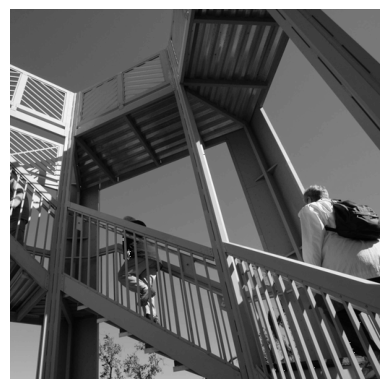

In [4]:
# Visualizing the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [10]:
# copying image into a anothter array

transformed_image = np.copy(ascent_image)
(x,y) = (transformed_image.shape[0],transformed_image.shape[1])
print("number of pixels on x axis:",x)
print("number of pixels on y axis:",y)

number of pixels on x axis: 512
number of pixels on y axis: 512


In [32]:
# Experimenting with different filters

#filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight = 1

In [33]:
# Applying convolutions on the image using filters

for i in range(1,x-1):
    for j in range(1,y-1):
        convolution = 0.0

        convolution += ascent_image[i-1,j-1] * filter[0][0]
        convolution += ascent_image[i-1,j] * filter[0][1]
        convolution += ascent_image[i-1,j+1] * filter[0][2]

        convolution += ascent_image[i,j-1] * filter[1][0]
        convolution += ascent_image[i,j] * filter[1][1]
        convolution += ascent_image[i,j+1] * filter[1][2]

        convolution += ascent_image[i+1,j-1] * filter[2][0]
        convolution += ascent_image[i+1,j] * filter[2][1]
        convolution += ascent_image[i+1,j+1] * filter[2][2]

        if(convolution < 0):
            convolution = 0
        if(convolution > 255):
            convolution = 255

        transformed_image[i,j] = convolution

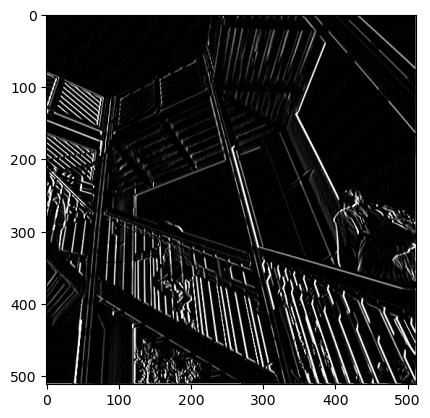

In [34]:
# Plot the transformed image.
plt.gray()
plt.grid(False)
plt.imshow(transformed_image)
plt.show()   

Effect of Max Pooling

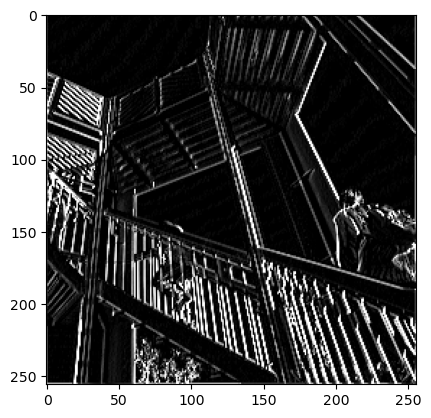

In [35]:
# Appling Max Pooling on the transformed Image

new_x = int(x/2)
new_y = int(y/2)

new_image = np.zeros((new_x,new_y))

for i in range(0,x,2):
    for j in range(0,y,2):
        pixels = []
        pixels.append(transformed_image[i,j])
        pixels.append(transformed_image[i,j+1])
        pixels.append(transformed_image[i+1,j])
        pixels.append(transformed_image[i,j+1])

        new_image[int(i/2),int(j/2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(new_image)
plt.show()   